In [2]:
#Standard numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randn

# Stats
from scipy import stats

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
#So plots appear in Ipython notebook
%matplotlib inline

In [14]:
from pandas_datareader import DataReader

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [15]:
for stock in tech_list:
    globals()[stock]= DataReader(stock,'yahoo',start,end)

In [16]:
AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,191.679993,188.380005,191.639999,191.240005,27862000.0,188.769211
2019-04-02,194.460007,191.050003,191.089996,194.020004,22765700.0,191.513290
2019-04-03,196.500000,193.149994,193.250000,195.350006,23271800.0,192.826111
2019-04-04,196.369995,193.139999,194.789993,195.690002,19114300.0,193.161682
2019-04-05,197.100006,195.929993,196.449997,197.000000,18526600.0,194.454758
...,...,...,...,...,...,...
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002


In [17]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,240.883611,235.744841,237.982738,238.539246,3.210522e+07,237.335264
std,43.904677,42.630697,43.138448,43.461559,1.734004e+07,44.038622
min,177.919998,170.270004,175.440002,173.300003,1.103886e+07,171.719727
25%,204.427502,201.270000,203.002499,202.832500,2.115442e+07,200.846684
50%,223.735001,219.279999,221.695000,222.930000,2.672145e+07,221.736465
75%,271.025002,265.507507,267.555008,269.037506,3.529838e+07,268.400505
max,327.850006,323.350006,324.739990,327.200012,1.067212e+08,327.200012


In [18]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2019-04-01 to 2020-03-30
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


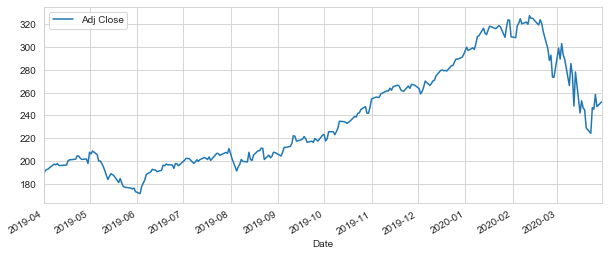

In [20]:
AAPL['Adj Close'].plot(legend = True,figsize=(10,4))

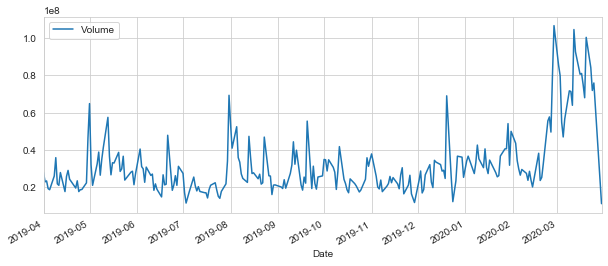

In [28]:
AAPL['Volume'].plot(legend=True,figsize=(10,4))

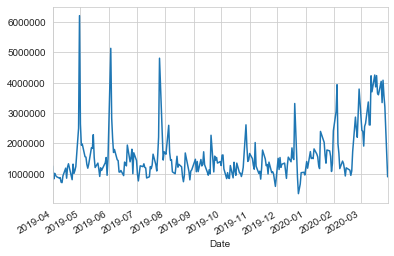

In [29]:
GOOG['Volume'].plot()

In [33]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

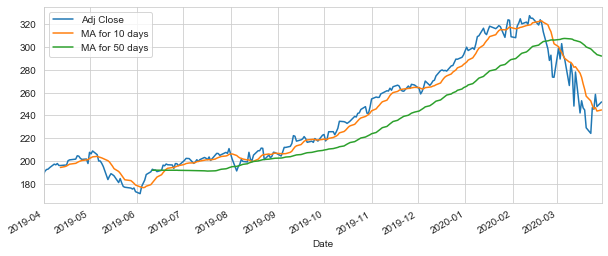

In [38]:
AAPL[['Adj Close','MA for 10 days','MA for 50 days']].plot(figsize=(10,4))

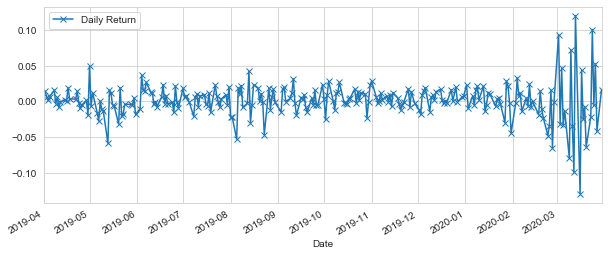

In [43]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(10,4),marker='x',legend=True)

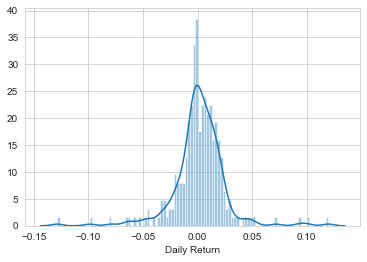

In [44]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100)

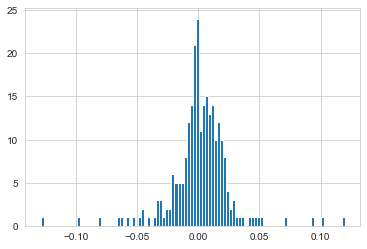

In [45]:
AAPL['Daily Return'].hist(bins=100)

In [47]:
closing_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [48]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-01,188.769211,1194.430054,117.465858,1814.189941
2019-04-02,191.513290,1200.489990,117.633636,1813.979980
2019-04-03,192.826111,1205.920044,118.403458,1820.699951
2019-04-04,193.161682,1215.000000,117.801422,1818.859985
2019-04-05,194.454758,1207.150024,118.324493,1837.280029
...,...,...,...,...
2020-03-24,246.880005,1134.459961,148.339996,1940.099976
2020-03-25,245.520004,1102.489990,146.919998,1885.839966
2020-03-26,258.440002,1161.750000,156.110001,1955.489990


In [49]:
tech_rets = closing_df.pct_change()

In [50]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-01,NaN,NaN,NaN,NaN
2019-04-02,0.014537,0.005073,0.001428,-0.000116
2019-04-03,0.006855,0.004523,0.006544,0.003705
2019-04-04,0.001740,0.007529,-0.005085,-0.001011
2019-04-05,0.006694,-0.006461,0.004440,0.010127
...,...,...,...,...
2020-03-24,0.100325,0.073669,0.090896,0.019587
2020-03-25,-0.005509,-0.028181,-0.009573,-0.027968
2020-03-26,0.052623,0.053751,0.062551,0.036933


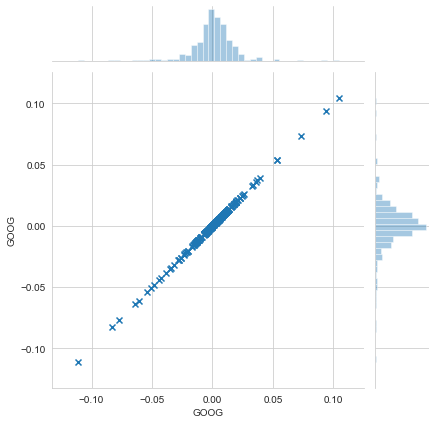

In [52]:
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',marker='x')

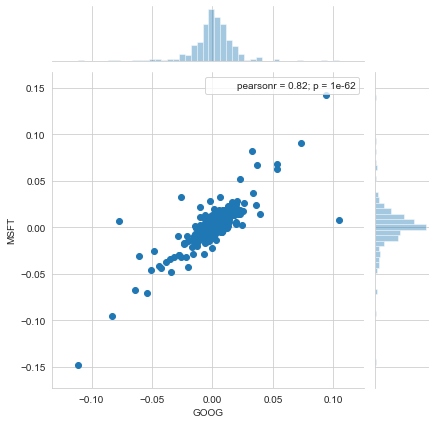

In [67]:
sns.jointplot('GOOG','MSFT',tech_rets).annotate(stats.pearsonr)

In [68]:
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-01,NaN,NaN,NaN,NaN
2019-04-02,0.014537,0.005073,0.001428,-0.000116
2019-04-03,0.006855,0.004523,0.006544,0.003705
2019-04-04,0.001740,0.007529,-0.005085,-0.001011
2019-04-05,0.006694,-0.006461,0.004440,0.010127


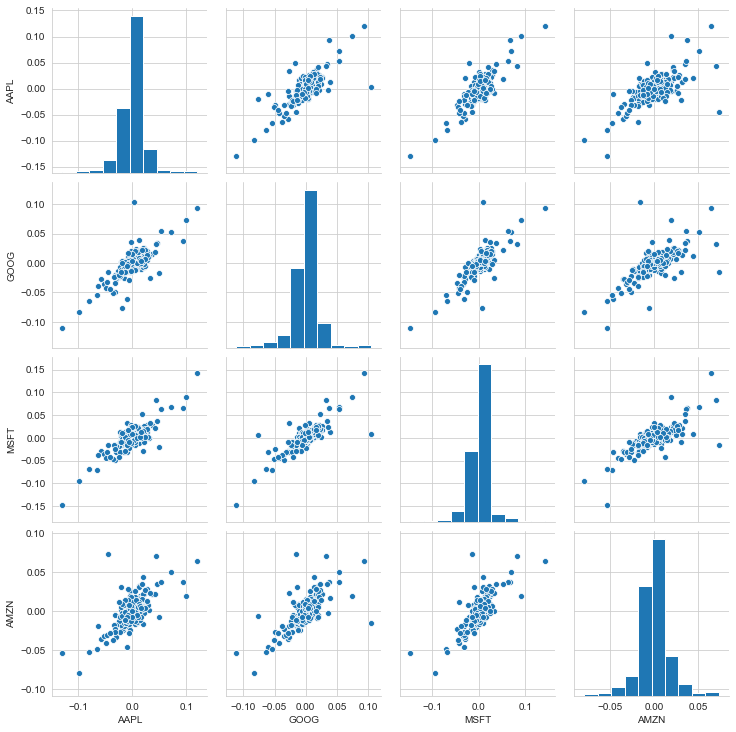

In [69]:
sns.pairplot(tech_rets.dropna())

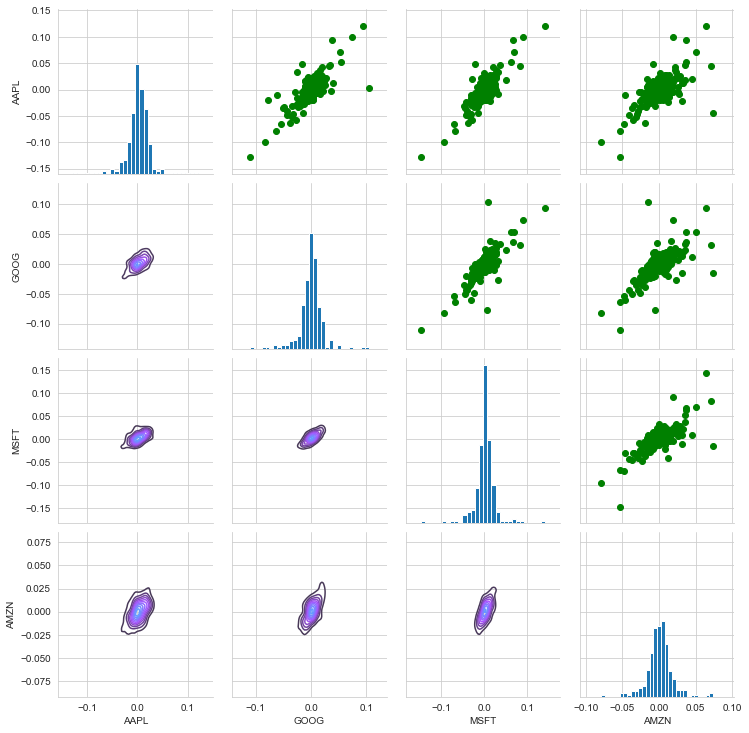

In [72]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

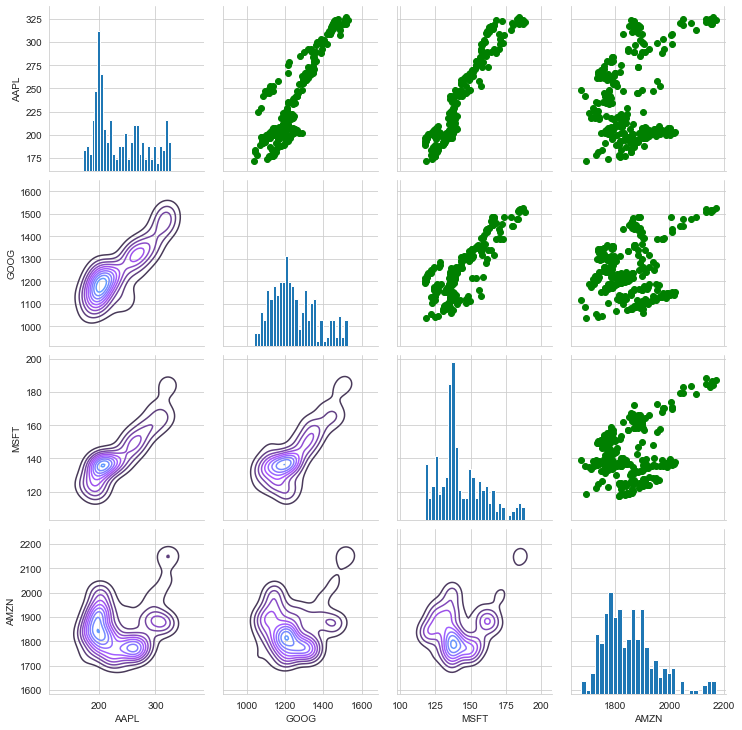

In [73]:
returns_fig = sns.PairGrid(closing_df.dropna())

returns_fig.map_upper(plt.scatter,color='green')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

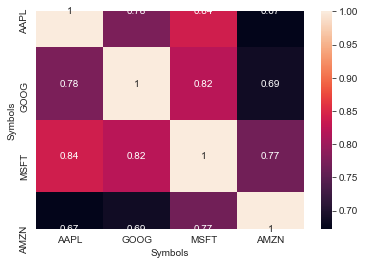

In [78]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

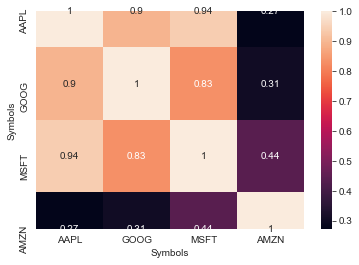

In [79]:
sns.heatmap(closing_df.corr(),annot=True)

In [80]:
rets = tech_rets.dropna()

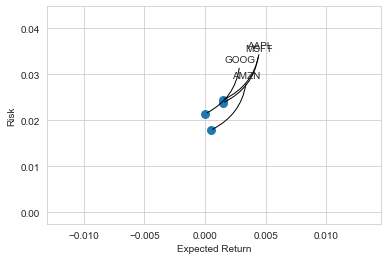

In [103]:
area= np.pi *20

plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3',color='black'))

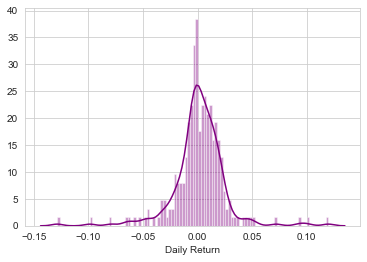

In [104]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [105]:
rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2019-04-02,0.014537,0.005073,0.001428,-0.000116
2019-04-03,0.006855,0.004523,0.006544,0.003705
2019-04-04,0.001740,0.007529,-0.005085,-0.001011
2019-04-05,0.006694,-0.006461,0.004440,0.010127
2019-04-08,0.015736,-0.002742,0.000334,0.006847


In [107]:
rets['AAPL'].quantile(0.95)

0.02833508737630719

In [108]:
days = 365
dt=1/days
mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [109]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price= np.zeros(days)
    price[0]=start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu*dt
        
        price[x] = price[x-1]+(price[x-1] * (drift[x]+shock[x]))
    return price
        

In [110]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-01,1196.660034,1182.000000,1184.099976,1194.430054,1252500,1194.430054
2019-04-02,1201.349976,1185.709961,1195.319946,1200.489990,827900,1200.489990
2019-04-03,1216.300049,1200.500000,1207.479980,1205.920044,1017800,1205.920044
2019-04-04,1215.670044,1204.130005,1205.939941,1215.000000,950000,1215.000000
2019-04-05,1216.219971,1205.030029,1214.989990,1207.150024,907200,1207.150024


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

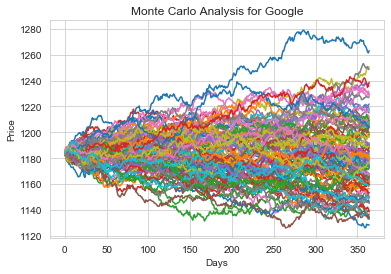

In [111]:
start_price =1184.10
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [112]:
runs = 10000
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    

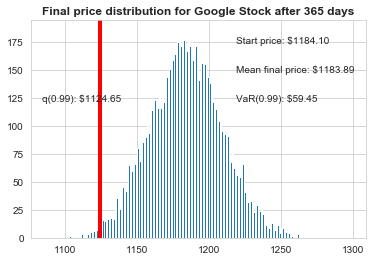

In [114]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');